In [0]:
#  This is where we import "packages". Think of these as pre-written bits of code (that are known to already work!) 
#      that we can just use.  
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Let's start with some example data:
Below is a plot of stars and quasars in color space: g-r color vs. u-g
--> Image of color sensitivity of SDSS observations

In [0]:
# Generate fake g-r and u-g data that kind of looks like the SDSS plot 
#   (avoid requiring access astroML this morning)

gr_qso_vals = np.random.normal(0.1, 0.2, 300)
ug_qso_vals = np.random.normal(0.2, 0.3, 300)


gr_stars_vals = np.random.normal(0.8, 0.2, 1000)
ug_stars_vals = np.random.normal(.8, 0.25, 1000)


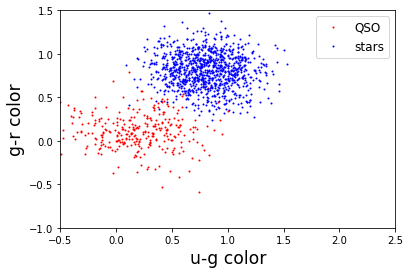

In [0]:
plt.plot(ug_qso_vals, gr_qso_vals, '.', ms=2, c='r', label='QSO')

plt.plot(ug_stars_vals, gr_stars_vals, '.', ms=2, c='b', label='stars')

plt.xlabel('u-g color',fontsize='xx-large')
plt.ylabel('g-r color',fontsize='xx-large')
plt.xlim(-.5,2.5)
plt.ylim(-1,1.5)
plt.legend(fontsize='large')

In [0]:
# (1) what a classifier does, concept of decision boundary.
# (2) illustrate --> if ambiguous overlapping data, maybe additional features are needed?
# (3) If the training set does not well represent the test set (e.g. brighter and easier to find in certain colors?)